In [1]:
pip install pmdarima

Note: you may need to restart the kernel to use updated packages.


In [2]:
#importing the requiered libraries 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from pandas.plotting import lag_plot
from pandas import datetime
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error,mean_absolute_error
import math 


<ipython-input-2-9199f8666be5>:6: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [3]:
#reading the data set.
df = pd.read_csv("C:/Users/RITWESH/Desktop/dtset.csv",delimiter =',')
print(df.head(5))

               Date   Open   High    Low  Close    Volume
0  04-01-2015 16:00  40.60  40.76  40.31  40.72  36865322
1  04-02-2015 16:00  40.66  40.74  40.12  40.29  37487476
2  04-06-2015 16:00  40.34  41.78  40.18  41.55  39223692
3  04-07-2015 16:00  41.61  41.91  41.31  41.53  28809375
4  04-08-2015 16:00  41.48  41.69  41.04  41.42  24753438


In [4]:
#stationarity check 
 # Perform Dickey-Fuller test:
def test_stationarity(timeseries):
   
    from statsmodels.tsa.stattools import adfuller
    print('Results of Dickey-Fuller Test:')
    
    
    dftest = adfuller(timeseries, autolag='AIC')
    
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', 'lags Used', 'Number of Observations Used'])
    
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    
    print(dfoutput)


ts = df['Close']
test_stationarity(ts)
#from result can be concluded that data is not stationary and it needs to be stationarised.



Results of Dickey-Fuller Test:
Test Statistic                    1.737136
p-value                           0.998216
lags Used                        24.000000
Number of Observations Used    1486.000000
Critical Value (1%)              -3.434758
Critical Value (5%)              -2.863487
Critical Value (10%)             -2.567807
dtype: float64


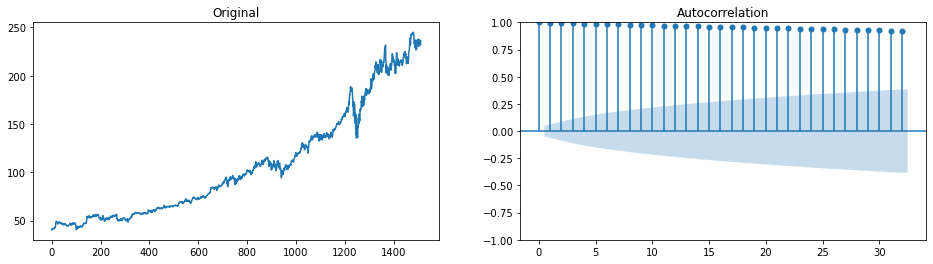

In [5]:
#data visualisation.
#plotting of acf.
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt
fig, (ax1, ax2)= plt.subplots(1, 2, figsize=(16,4))
ax1.plot(df.Close)
ax1.set_title("Original")
plot_acf(df.Close,ax=ax2);

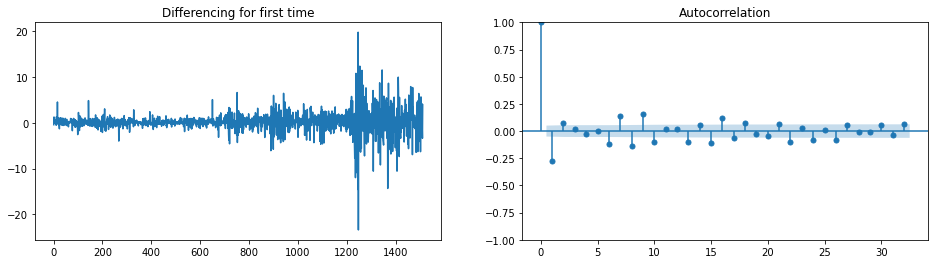

In [7]:
import matplotlib.pyplot as plt
diff= df.Close.diff().dropna()
fig, (ax1, ax2)= plt.subplots(1, 2, figsize=(16,4))
ax1.plot(diff)
ax1.set_title("Differencing for first time")
plot_acf(diff, ax=ax2);

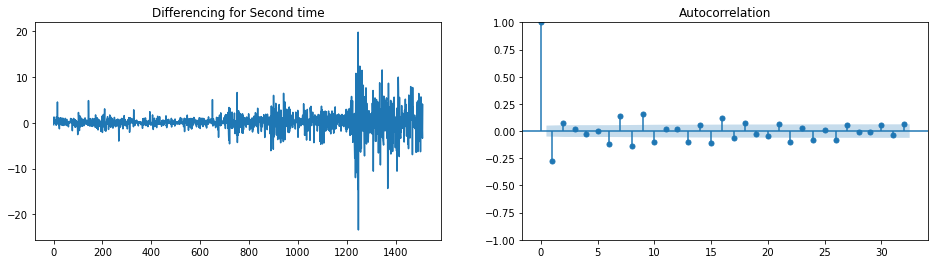

In [8]:
import matplotlib.pyplot as plt
diff= df.Close.diff().dropna()
fig, (ax1, ax2)= plt.subplots(1, 2, figsize=(16,4))
ax1.plot(diff)
ax1.set_title("Differencing for Second time")
plot_acf(diff, ax=ax2);

C:\Users\RITWESH\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


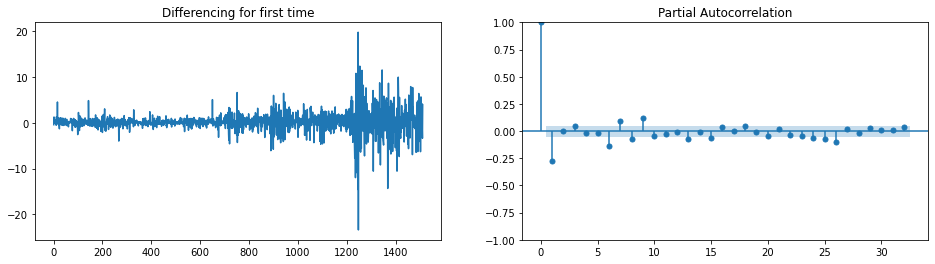

In [9]:
# As there is no much difference the graph of differencing for 1 and 2 time, we will take d=1
#else series will become overdiffrenced 

# Now p ,is the order of AR term which refers to numbers of lags to be used as predicors
# we can find out the required number of AR terms by using PACF plot
# PACF represents the correlation between the series and its lags
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_pacf

diff= df.Close.diff().dropna()
fig, (ax1,ax2)= plt.subplots(1,2,figsize=(16,4))
ax1.plot(diff)
ax1.set_title("Differencing for first time")
ax2.set_ylim(0,1)
plot_pacf(diff, ax=ax2);

In [10]:
#again performing the stationarity test.
def test_stationarity(timeseries):
  
    from statsmodels.tsa.stattools import adfuller
    print('Results of Dickey-Fuller Test:')
    
    
    dftest = adfuller(timeseries)
    
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', 'lags Used', 'Number of Observations Used'])
    
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    
    print(dfoutput)
test_stationarity(diff)
#from results it can be seen that data has been stationarised after the first order differencing hence the d=1.



Results of Dickey-Fuller Test:
Test Statistic                -1.003833e+01
p-value                        1.519594e-17
lags Used                      2.400000e+01
Number of Observations Used    1.485000e+03
Critical Value (1%)           -3.434761e+00
Critical Value (5%)           -2.863488e+00
Critical Value (10%)          -2.567807e+00
dtype: float64


In [17]:
#training and testing of data.
train_data, test_data = df[0:int(len(df)*0.7)], df[int(len(df)*0.7):]
training_data = train_data['Close'].values
test_data = test_data['Close'].values
history = [x for x in training_data]
#applying the ARIMA model.
model_predictions = []
N_test_observations = len(test_data)
for time_point in range(N_test_observations):
    model = ARIMA(history, order=(7,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    model_predictions.append(yhat)
    true_test_value = test_data[time_point]
    history.append(true_test_value)
#evaluation of mean squared error and mean absolute error.
MSE_error = mean_squared_error(test_data, model_predictions)
print('Testing Mean Squared Error is {}'.format(MSE_error))
mae = mean_absolute_error(test_data, model_predictions)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(test_data, model_predictions))
print('RMSE: '+str(rmse))
mape = np.mean(np.abs(model_predictions - test_data)/np.abs(test_data))
print('MAPE: '+str(mape))
acr=100-(100*mape)
print('ACCURACY: '+str(acr))
#with mape= 1.4% ,We have accuracy 98.6% by formula accuracy=100-100*MAPE



Testing Mean Squared Error is 14.435744869837611
MAE: 2.661545451067
RMSE: 3.7994400731999463
MAPE: 0.014615820036870057
ACCURACY: 98.538417996313


In [12]:
from pmdarima import auto_arima
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

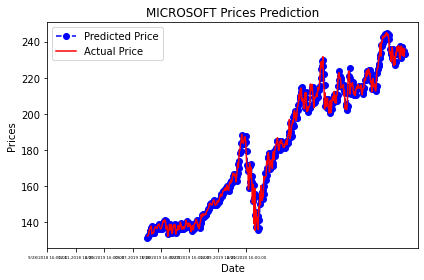

<Figure size 288x72 with 0 Axes>

In [13]:
#data vusualisation of actual data and predicted values.
test_set_range = df[int(len(df)*0.7):].index
plt.plot(test_set_range, model_predictions, color='blue', marker='o', linestyle='dashed',label='Predicted Price')
plt.plot(test_set_range, test_data, color='red', label='Actual Price')
plt.title('MICROSOFT Prices Prediction')
plt.xlabel('Date')
plt.ylabel('Prices')
plt.xticks(np.arange(881,1259,50), df.Date[881:1259:50])
plt.legend()

plt.tick_params(axis='x', which='major', labelsize=4)
plt.tight_layout()
f=plt.figure()
f.set_figwidth(4)
f.set_figheight(1)
plt.show()